In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
X = np.random.randint(100, size=100)
print(X)

[53  0  6 89 45 30 42 98 51 24 85 12 20 36 64 39 86 61 88 51 95 75 98  5
 58 27 60 21 22 50 19 75 96 30 18 58 56 48 25 76  6  5 98  8 32 96 94 56
 93 37 20 80 97  3  0 62 65 32 33 10 93  5 13 27 80 64 58 72 68 37 90 57
 68 18 27 43 50 91 15 84 98  4 90 14 71  1 20 61 97 63 44 22 35 92 46 11
 15 72 66 66]


In [10]:
#1
range_X = np.ptp(X)
print(range_X)

mu = np.mean(X)
MAD = np.sum([np.abs(x - mu) for x in X])/len(X)
print(MAD)

print(np.var(X))
print(np.std(X))

filtered = [x for x in X if x <=mu]
semivariance = np.sum([np.abs(x - mu) ** 2 for x in filtered])/len(filtered)
print(semivariance)

98
26.643199999999997
936.2611000000002
30.598383944254312
959.3655666666667


In [11]:
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

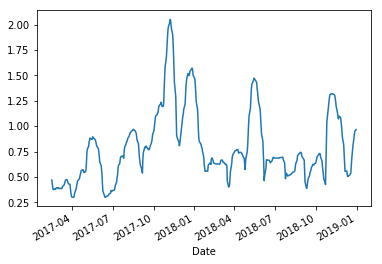

In [18]:
#2
att =  pdr.data.DataReader('T', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]
rolling_mean = att.rolling(30).mean().dropna()
rolling_std = att.rolling(30).std().dropna()

rolling_std.plot()

In [23]:
#3
asset1 =  pdr.data.DataReader('AAPL', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]
asset2 =  pdr.data.DataReader('XLF', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]

cov = np.cov(asset1, asset2)[0,1]
print(cov)

w1=0.8
w2=1-w1

v1 = np.var(asset1)
v2 = np.var(asset2)

pvariance = (w1**2) * v1 + (w2 ** 2) * v2 + (2 * w1 * w2) * cov
print(pvariance)

40.999354596331635
481.7594593098086
